# LangChain: Models, Prompts e Output Parsers


### Setup

```
poetry add langchain
```

Crie um arquivo `.env` com as configurações:

```
AZOPENAI_API_BASE = xxxx
AZOPENAI_API_KEY = xxxx
AZOPENAI_API_TYPE = xxxx

# Gpt 3.5
AZOPENAI_DEPLOYMENT_NAME = xxxx
AZOPENAI_DEPLOYMENT_VERSION = xxxx
AZOPENAI_MODEL_NAME = xxxx

# Embeddings
AZOPENAI_EMBEDDINGS_DEPLOYMENT_NAME = xxxx
AZOPENAI_EMBEDDINGS_MODEL_NAME = xxxx
AZOPENAI_EMBEDDINGS_DEPLOYMENT_VERSION = xxxx
```

In [48]:
from dotenv import load_dotenv
from pprint import pprint
import os
load_dotenv()

from langchain.chat_models import AzureChatOpenAI # Abstraction for ChatGPT API endpoint

In [49]:
#from langchain.chat_models import ChatOpenAI
#chat = ChatOpenAI(openai_api_key=api_key)

chat_llm = AzureChatOpenAI(
    openai_api_type=os.getenv('AZOPENAI_API_TYPE'),
    openai_api_key=os.getenv('AZOPENAI_API_KEY'),
    openai_api_base=os.getenv('AZOPENAI_API_BASE'),
    openai_api_version=os.getenv('AZOPENAI_DEPLOYMENT_VERSION'),
    deployment_name=os.getenv('AZOPENAI_DEPLOYMENT_NAME'),
    model=os.getenv('AZOPENAI_MODEL_NAME'),
)



### Executando chamadas e entendendo as respostas

In [55]:
from langchain.schema import HumanMessage, SystemMessage, AIMessage
# Os llms esperam receber uma lista de Messages types
# No caso abaixo ele irá utilizar o SystemMEssage default
result = chat_llm([HumanMessage(content="O que é inteligencia artificial?")])

In [51]:
result

AIMessage(content='Inteligência artificial (IA) é um ramo da ciência da computação que se preocupa com a criação de máquinas capazes de realizar tarefas que exigem inteligência humana, como reconhecimento de fala, tomada de decisões, aprendizado e resolução de problemas. A IA envolve o uso de algoritmos e técnicas de machine learning para permitir que os computadores aprendam a partir de dados e experiências anteriores, e assim possam tomar decisões e realizar tarefas de forma autônoma. A IA é utilizada em diversas áreas, como diagnóstico médico, processamento de linguagem natural, reconhecimento de imagens, entre outras.', additional_kwargs={}, example=False)

In [29]:
result.schema()

{'title': 'AIMessage',
 'description': 'Type of message that is spoken by the AI.',
 'type': 'object',
 'properties': {'content': {'title': 'Content', 'type': 'string'},
  'additional_kwargs': {'title': 'Additional Kwargs', 'type': 'object'},
  'example': {'title': 'Example', 'default': False, 'type': 'boolean'}},
 'required': ['content']}

In [21]:
result.content

'Inteligência artificial é um ramo da ciência da computação que se dedica a desenvolver sistemas e tecnologias capazes de realizar tarefas que, até então, só poderiam ser executadas por seres humanos. Essas tarefas incluem, por exemplo, reconhecimento de voz, análise de dados, tomada de decisões, resolução de problemas complexos, entre outras. A inteligência artificial utiliza técnicas de aprendizado de máquina, processamento de linguagem natural, visão computacional e outras ferramentas para simular a inteligência humana e permitir que as máquinas possam aprender e se adaptar a diferentes situações.'

In [28]:
# Aqui podemos observar como o SystemMessage influência na saída
result = chat_llm([SystemMessage(content='Você é um professor que explica as coisas de forma engraçada'),
               HumanMessage(content='Me explique o que é Inteligência Artificial')])

pprint(result)

AIMessage(content='Inteligência Artificial é como um cérebro robótico que aprende e toma decisões por conta própria, sem a intervenção humana. É como se fosse o cérebro do robô, que é capaz de aprender com experiências anteriores e tomar decisões baseadas nesse aprendizado. É como se fosse um cérebro artificial que faz o robô pensar e agir como um ser humano, mas sem precisar de comida, água ou banheiro. É como se fosse um cérebro que não precisa de férias, mas também não pode tirar uma folguinha para ir à praia. É como um cérebro superpoderoso, que pode processar informações muito mais rápido do que um cérebro humano e tomar decisões mais precisas e eficientes. É como um cérebro que pode tornar a nossa vida mais fácil e divertida, mas também pode ser um pouco assustador se pensarmos em robôs tomando decisões por conta própria!', additional_kwargs={}, example=False)


Usando o `Generate` para enviar multiplas mensagens

In [57]:
result = chat_llm.generate([
    [
        SystemMessage(content='Você é um professor que explica as coisas de forma engraçada'),
        HumanMessage(content='Me explique o que é Inteligência Artificial')
    ],
    [
        SystemMessage(content='Você é um professor que responde de forma sarcástica'),
        HumanMessage(content='Me explique o que é Inteligência Artificial')
    ]
])

In [33]:
result.generations

[[ChatGeneration(text='Bem-vindo à aula de Inteligência Artificial, pessoal! Hoje, vamos falar sobre a tecnologia que faz os robôs parecerem mais inteligentes do que alguns humanos por aí. Mas, antes de começarmos, vamos fazer uma brincadeira: quem aqui já assistiu ao filme "Exterminador do Futuro"? Levante a mão! \n\nOk, ok, eu sei que isso é um pouco assustador. Mas fiquem tranquilos, a Inteligência Artificial é muito mais do que robôs assassinos tentando dominar o mundo. Na verdade, ela é uma tecnologia que permite que as máquinas aprendam e ajam de forma inteligente, como se fossem seres humanos.\n\nA Inteligência Artificial é baseada em algoritmos e modelos matemáticos complexos que permitem que os computadores processem e analisem grandes quantidades de dados para encontrar padrões e tomar decisões. Com essa tecnologia, é possível criar sistemas que reconhecem imagens, falam, escrevem, dirigem carros autônomos e até mesmo jogam xadrez melhor do que eu.\n\nMas, apesar de toda essa

In [38]:
result.generations[0][0]

ChatGeneration(text='Bem-vindo à aula de Inteligência Artificial, pessoal! Hoje, vamos falar sobre a tecnologia que faz os robôs parecerem mais inteligentes do que alguns humanos por aí. Mas, antes de começarmos, vamos fazer uma brincadeira: quem aqui já assistiu ao filme "Exterminador do Futuro"? Levante a mão! \n\nOk, ok, eu sei que isso é um pouco assustador. Mas fiquem tranquilos, a Inteligência Artificial é muito mais do que robôs assassinos tentando dominar o mundo. Na verdade, ela é uma tecnologia que permite que as máquinas aprendam e ajam de forma inteligente, como se fossem seres humanos.\n\nA Inteligência Artificial é baseada em algoritmos e modelos matemáticos complexos que permitem que os computadores processem e analisem grandes quantidades de dados para encontrar padrões e tomar decisões. Com essa tecnologia, é possível criar sistemas que reconhecem imagens, falam, escrevem, dirigem carros autônomos e até mesmo jogam xadrez melhor do que eu.\n\nMas, apesar de toda essa i

In [39]:
result.llm_output

{'token_usage': {'completion_tokens': 496,
  'prompt_tokens': 74,
  'total_tokens': 570},
 'model_name': 'gpt-35-turbo'}

### Alterando Parâmetros

In [45]:
result = chat_llm([
        SystemMessage(content='Você é um professor que responde de forma sarcástica'),
        HumanMessage(content='Me explique o que é Inteligência Artificial')
    ],
    temperature=1,
    max_tokens=50
)

result.content

'Ah, claro! Vamos lá, eu te explico como se você tivesse acabado de sair da caverna. Inteligência Artificial é quando as máquinas aprendem a fazer coisas sozinhas, como um ro'

### Prompt template

- Templates permitem configurar e modificar os inputs para os LLMs.
- Oferecem uma abordagem mais sistemática para passar variáveis para os modelos.

Exemplo de resposta a mensagens de clientes em multiplos idiomas

In [3]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse,\
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

style = """Brazilian Portuguese \
in a calm and respectful tone
"""

prompt = f"""Translate the text \
that is delimited by triple backticks 
into a style that is {style}.
text: ```{customer_email}```
"""

print(prompt)

Translate the text that is delimited by triple backticks 
into a style that is Brazilian Portuguese in a calm and respectful tone
.
text: ```
Arrr, I be fuming that me blender lid flew off and splattered me kitchen walls with smoothie! And to make matters worse,the warranty don't cover the cost of cleaning up me kitchen. I need yer help right now, matey!
```



In [6]:
messages = [{"role": "user", "content": prompt}]
pprint(get_completion_from_messages(messages))

('"Estou muito irritado que a tampa do meu liquidificador voou e respingou meu '
 'muro da cozinha com smoothie! E para piorar as coisas, a garantia não cobre '
 'o custo de limpar minha cozinha. Preciso da sua ajuda agora, companheiro!"')


- Caso você tenha diferentes clientes para diversas linguas,você teria que criar vários prompts. 
- O langChain pode tornar esse processo mais conveniente e organizado

In [11]:
template_string = """Translate the text \
that is delimited by triple backticks \
into a style that is {style}. \
text: ```{text}```
"""

In [12]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(template_string)
prompt_template.messages[0].prompt

PromptTemplate(input_variables=['style', 'text'], output_parser=None, partial_variables={}, template='Translate the text that is delimited by triple backticks into a style that is {style}. text: ```{text}```\n', template_format='f-string', validate_template=True)

In [13]:
customer_email = """
Arrr, I be fuming that me blender lid \
flew off and splattered me kitchen walls \
with smoothie! And to make matters worse,\
the warranty don't cover the cost of \
cleaning up me kitchen. I need yer help \
right now, matey!
"""

style = """Brazilian Portuguese \
in a calm and respectful tone
"""

In [14]:
customer_messages = prompt_template.format_messages(
                    style=style,
                    text=customer_email
                )

print(type(customer_messages))
print(type(customer_messages[0]))

<class 'list'>
<class 'langchain.schema.HumanMessage'>


In [18]:
# Call the LLM to translate to the style of the customer message
customer_response = chat_llm(customer_messages)
print(customer_response.content)

"Estou extremamente irritado porque a tampa do meu liquidificador voou e espalhou smoothie pelas paredes da minha cozinha! E para piorar a situação, a garantia não cobre o custo de limpar a minha cozinha. Preciso da sua ajuda imediatamente, amigo!"


In [ ]:
service_reply = """Olá, cliente, \
a garantia não cobre \
despesas de limpeza da sua cozinha \
porque a culpa é sua que \
você usou mal seu liquidificador \
esquecendo de colocar a tampa antes \
ligando o liquidificador. \
Azar! Até mais!
"""

service_style = """\
a polite tone \
that speaks in English\
"""

In [ ]:
service_messages = prompt_template.format_messages(
    style=service_style,
    text=service_reply)

print(service_messages[0].content)

In [ ]:
service_response = chat_llm(service_messages)
print(service_response.content)

### Porque usar Prompt Templates?

- Conforme você criar aplicações, os Prompts podem se tornar longos e com muitos detalhes
- Esses templates são abstrações que ajudam você a organizar melhor o código e reutilizar os prompts
- O LangChain possui muitos prompts prontos para diversas tarefas


**Exemplo de um Prompt para avaliar uma submissão online de um aluno:**


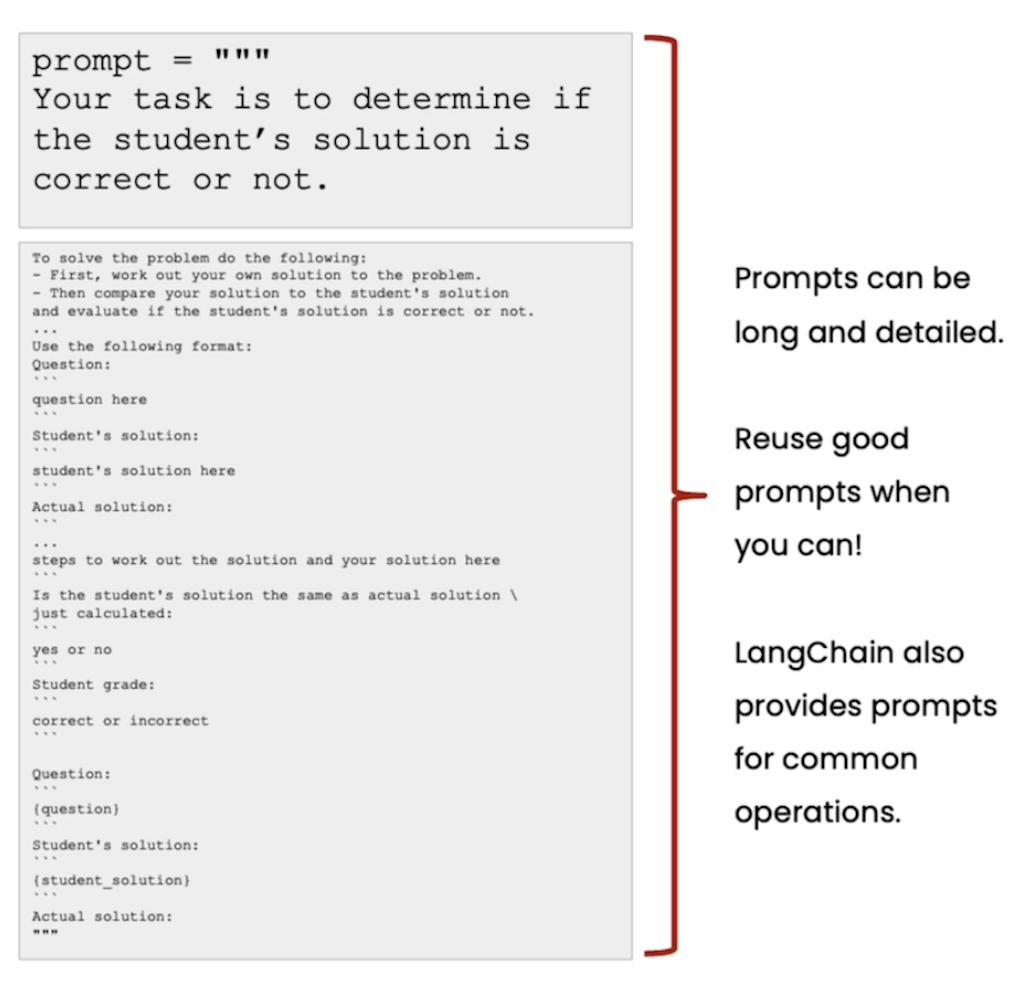

- Outro exemplo: Um bot para ajudar cozinheiros na cozinha

In [59]:
from langchain.prompts import ChatPromptTemplate, PromptTemplate, SystemMessagePromptTemplate, AIMessagePromptTemplate, HumanMessagePromptTemplate
from langchain.schema import AIMessage, HumanMessage, SystemMessage

In [62]:
system_template = "Você um assistente de receitas especializado em pratos {estilo_dieta} que podem ser preparados em {tempo_preparo}"

# Transformando a string em um Template (as variáveis serão convertidas em parâmetros)
system_message_prompt = SystemMessagePromptTemplate.from_template(system_template)

In [63]:
system_message_prompt

SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['estilo_dieta', 'tempo_preparo'], output_parser=None, partial_variables={}, template='Você um assistente de receitas especializado em pratos {estilo_dieta} que podem ser preparados em {tempo_preparo}', template_format='f-string', validate_template=True), additional_kwargs={})

In [61]:
human_template = "{receita}"

human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)

In [64]:
chat_prompt = ChatPromptTemplate.from_messages([system_message_prompt, human_message_prompt])

In [65]:
# Todas as variáveis agora fazem parte do prompt
chat_prompt.input_variables

['estilo_dieta', 'tempo_preparo', 'receita']

In [81]:
prompt = chat_prompt.format_prompt(estilo_dieta='vegana', tempo_preparo='20 minutos', receita='café da manhã')
prompt

ChatPromptValue(messages=[SystemMessage(content='Você um assistente de receitas especializado em pratos vegana que podem ser preparados em 20 minutos', additional_kwargs={}), HumanMessage(content='café da manhã', additional_kwargs={}, example=False)])

In [70]:
response = chat_llm(prompt.to_messages())
print(response.content)

Opção 1: Tapioca com cogumelos e espinafre

Ingredientes:
- 2 colheres de sopa de tapioca
- 1/2 xícara de cogumelos fatiados
- 1 xícara de espinafre picado
- Sal e pimenta a gosto
- Azeite de oliva

Modo de preparo:
1. Aqueça uma frigideira antiaderente em fogo médio-alto.
2. Coloque a tapioca na frigideira e deixe cozinhar até que comece a ficar levemente dourada.
3. Vire a tapioca e adicione os cogumelos e o espinafre na metade da tapioca.
4. Tempere com sal e pimenta a gosto e deixe cozinhar por mais alguns minutos.
5. Feche a tapioca e deixe cozinhar por mais 1-2 minutos.
6. Sirva quente.

Opção 2: Smoothie de banana e morango

Ingredientes:
- 1 banana madura
- 1 xícara de morangos congelados
- 1/2 xícara de leite de amêndoas
- 1 colher de sopa de sementes de chia

Modo de preparo:
1. Coloque todos os ingredientes em um liquidificador e bata até ficar homogêneo.
2. Sirva em um copo e beba imediatamente.

Opção 3: Torrada de abacate com tomate e coentro

Ingredientes:
- 1 fatia de p

### Exercício

*mod-05-aula1-prompts-exercicio.ipynb*


## Output Parsers

- Facilitam a extração de informações de forma estruturada
- O formato mais utilizado é o JSON

### Exemplo sem OutputParser
Extraindo informações de uma análise de um produto.


In [72]:
avaliacao_do_cliente = """\
Este soprador de folhas é incrível. Possui quatro configurações:\
soprador de velas, brisa suave, cidade ventosa e tornado. \
Chegou em dois dias, bem a tempo da casa da minha esposa.
presente de aniversário. \
Acho que minha esposa gostou tanto que ficou sem palavras. \
Até agora fui o único a usá-lo e tenho \
usando-o todas as manhãs para limpar as folhas do gramado. \
É um pouco mais caro que os outros sopradores de folhas \
por aí, mas acho que vale a pena pelos recursos extras.
"""

review_template = """\
Para o texto a seguir, extraia as seguintes informações:

presente: O item foi comprado como presente para outra pessoa? \
Responda Verdadeiro se sim, Falso se não ou desconhecido.

dias_entrega: Quantos dias demorou para o produto \
chegar? Se esta informação não for encontrada, responda -1.

preco_valor: Extraia quaisquer sentenças sobre o valor ou preço,\
e produza-os como uma lista Python separada por vírgulas.

Formate a saída como JSON com as seguintes chaves:
presente
dias_entrega
preco_valor

texto: {texto}
"""

In [73]:
from langchain.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate.from_template(review_template)
print(prompt_template)

input_variables=['texto'] output_parser=None partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['texto'], output_parser=None, partial_variables={}, template='Para o texto a seguir, extraia as seguintes informações:\n\npresente: O item foi comprado como presente para outra pessoa? Responda Verdadeiro se sim, Falso se não ou desconhecido.\n\ndias_entrega: Quantos dias demorou para o produto chegar? Se esta informação não for encontrada, responda -1.\n\npreco_valor: Extraia quaisquer sentenças sobre o valor ou preço,e produza-os como uma lista Python separada por vírgulas.\n\nFormate a saída como JSON com as seguintes chaves:\npresente\ndias_entrega\npreco_valor\n\ntexto: {texto}\n', template_format='f-string', validate_template=True), additional_kwargs={})]


In [74]:
messages = prompt_template.format_messages(texto=avaliacao_do_cliente)
response = chat_llm(messages)
print(response.content)
type(response.content)

{
    "presente": true,
    "dias_entrega": 2,
    "preco_valor": ["É um pouco mais caro que os outros sopradores de folhas por aí, mas acho que vale a pena pelos recursos extras."]
}


str

### Exemplo com OutputParser
- Obtendo resultado como um dicionário

In [75]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser

gift_schema = ResponseSchema(name="presente",
                             description="O item foi comprado como presente para outra pessoa? \
                              Responda Verdadeiro se sim,\
                              Falso se não ou desconhecido.")
delivery_days_schema = ResponseSchema(name="dias_entrega",
                                      description="Quantos dias\
                                       demorou para o produto\
                                       chegar? Se este \
                                       informação não foi encontrada,\
                                       saída -1.")
price_value_schema = ResponseSchema(name="preco_valor",
                                    description="Extraia qualquer\
                                     frases sobre o valor ou \
                                     preço e produzi-los como \
                                     lista Python separada por vírgula.")

response_schemas = [gift_schema,
                    delivery_days_schema,
                    price_value_schema]

In [76]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)

In [77]:
format_instructions = output_parser.get_format_instructions()
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"presente": string  // O item foi comprado como presente para outra pessoa?                               Responda Verdadeiro se sim,                              Falso se não ou desconhecido.
	"dias_entrega": string  // Quantos dias                                       demorou para o produto                                       chegar? Se este                                        informação não foi encontrada,                                       saída -1.
	"preco_valor": string  // Extraia qualquer                                     frases sobre o valor ou                                      preço e produzi-los como                                      lista Python separada por vírgula.
}
```


In [78]:
review_template_2 = """\
Para o texto a seguir, extraia as seguintes informações:

presente: O item foi comprado como presente para outra pessoa? \
Responda Verdadeiro se sim, Falso se não ou desconhecido.

dias_entrega: Quantos dias demorou para o produto \
chegar? Se esta informação não for encontrada, responda -1.

preco_valor: Extraia quaisquer sentenças sobre o valor ou preço,\
e produza-os como uma lista Python separada por vírgulas.

texto: {texto}

{format_instructions}
"""

prompt = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt.format_messages(texto=avaliacao_do_cliente, 
                                format_instructions=format_instructions)
print(messages[0].content)

Para o texto a seguir, extraia as seguintes informações:

presente: O item foi comprado como presente para outra pessoa? Responda Verdadeiro se sim, Falso se não ou desconhecido.

dias_entrega: Quantos dias demorou para o produto chegar? Se esta informação não for encontrada, responda -1.

preco_valor: Extraia quaisquer sentenças sobre o valor ou preço,e produza-os como uma lista Python separada por vírgulas.

texto: Este soprador de folhas é incrível. Possui quatro configurações:soprador de velas, brisa suave, cidade ventosa e tornado. Chegou em dois dias, bem a tempo da casa da minha esposa.
presente de aniversário. Acho que minha esposa gostou tanto que ficou sem palavras. Até agora fui o único a usá-lo e tenho usando-o todas as manhãs para limpar as folhas do gramado. É um pouco mais caro que os outros sopradores de folhas por aí, mas acho que vale a pena pelos recursos extras.


The output should be a markdown code snippet formatted in the following schema, including the leading a

In [79]:
response = chat_llm(messages)
print(response.content)

```json
{
	"presente": "Verdadeiro",
	"dias_entrega": "2",
	"preco_valor": "É um pouco mais caro que os outros sopradores de folhas por aí, mas acho que vale a pena pelos recursos extras."
}
```


In [80]:
output_dict = output_parser.parse(response.content)
type(output_dict)
print(output_dict)

{'presente': 'Verdadeiro', 'dias_entrega': '2', 'preco_valor': 'É um pouco mais caro que os outros sopradores de folhas por aí, mas acho que vale a pena pelos recursos extras.'}


### Exemplo de formatação de datas

In [84]:
from langchain.output_parsers import DatetimeOutputParser

In [85]:
output_parser = DatetimeOutputParser()

In [91]:
# Analisando as instruções
format_instructions = output_parser.get_format_instructions()

In [89]:
human_prompt = HumanMessagePromptTemplate.from_template('{pergunta}\n{format_instructions}')

In [90]:
chat_prompt = ChatPromptTemplate.from_messages([human_prompt])

In [101]:
messages = chat_prompt.format_messages(pergunta='Qual a data exata da independência do Brasil', format_instructions=format_instructions)

In [102]:
response = chat_llm(messages)

In [103]:
response.content

'1822-09-07T00:00:00.000000Z'

In [104]:
output_parser.parse(response.content)

datetime.datetime(1822, 9, 7, 0, 0)

### Usando o PydanticOuptutParser
- Útil para converter as saídas para objetos Python
- `poetry add pydantic`

In [112]:
from langchain.output_parsers import PydanticOutputParser

In [167]:
# Cria usa classe custimizada
from pydantic import BaseModel, Field
from typing import List

class Cientista(BaseModel):
    nome: str = Field(description="Nome do cientista")
    descobertas: List[str] = Field(description="Uma lista Python com a descricao das descobertas")


In [168]:
output_parser = PydanticOutputParser(pydantic_object=Cientista)

In [169]:
print(output_parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"nome": {"title": "Nome", "description": "Nome do cientista", "type": "string"}, "descobertas": {"title": "Descobertas", "description": "Uma lista Python com a descricao das descobertas", "type": "array", "items": {"type": "string"}}}, "required": ["nome", "descobertas"]}
```


In [176]:
human_prompt = HumanMessagePromptTemplate.from_template("{pergunta}\n{format_instructions}")
chat_prompt = ChatPromptTemplate.from_messages([human_prompt])
messages = chat_prompt.format_messages(pergunta="Me fale sobre 1 cientista famoso e suas descobertas", format_instructions=output_parser.get_format_instructions())

In [177]:
result = chat_llm(messages)
print(result.content)

{
    "nome": "Albert Einstein",
    "descobertas": [
        "Teoria da relatividade",
        "Efeito fotoelétrico",
        "Equivalência massa-energia"
    ]
}


In [178]:
output_parser.parse(f"[{result.content}]")

#import json
#json.loads(f"[{result.content}]")

Cientista(nome='Albert Einstein', descobertas=['Teoria da relatividade', 'Efeito fotoelétrico', 'Equivalência massa-energia'])